In [27]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

pd.set_option("display.max_rows", 11)
pd.options.mode.chained_assignment = None #No warning message and no exception is raised

training_data = pd.read_csv("../data/training_data.csv")

training_data.head()

print(training_data.shape)

(3232, 11)


In [28]:
training_data

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
3227,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
3228,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
3229,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
3230,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


In [29]:
#Create a DataFrame for the facies label
faciesLabel = pd.DataFrame({"Facies":[1,2,3,4,5,6,7,8,9],
                            "Label":["SS","Csis","FSiS",
                                     "SiSh","MS","WS","D","PS","BS"],
                             "Adjacent Facies":[2, "1,3", 2,5,"4,6",
                                                "5,7","6,8","6,7,9","7,8"]
                           })
faciesLabel

,Facies,Label,Adjacent Facies
0,1,SS,2
1,2,Csis,"1,3"
2,3,FSiS,2
3,4,SiSh,5
4,5,MS,"4,6"
5,6,WS,"5,7"
6,7,D,"6,8"
7,8,PS,"6,7,9"
8,9,BS,"7,8"


In [30]:
#Clean up the training data set
training_data['Formation'] = training_data['Formation'].astype('category')
training_data['Well Name'] = training_data['Well Name'].astype('category')
training_data['Well Name'].unique()

[SHRIMPLIN, SHANKLE, LUKE G U, CROSS H CATTLE, NOLAN, Recruit F9, NEWBY, CHURCHMAN BIBLE]
Categories (8, object): [SHRIMPLIN, SHANKLE, LUKE G U, CROSS H CATTLE, NOLAN, Recruit F9, NEWBY, CHURCHMAN BIBLE]

In [31]:
training_data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


In [32]:
#Remove well NOLAN as a blind well tester
blind_well = training_data[training_data["Well Name"]=="NOLAN"]
training_data = training_data[training_data["Well Name"] !="NOLAN"]
blind_well

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
1882,2,A1 SH,NOLAN,2853.5,106.813,0.533,9.339,15.222,3.500,1,1.000
1883,3,A1 SH,NOLAN,2854.0,100.938,0.542,8.857,15.313,3.416,1,0.977
1884,3,A1 SH,NOLAN,2854.5,94.375,0.553,7.097,14.583,3.195,1,0.955
1885,3,A1 SH,NOLAN,2855.0,89.813,0.554,7.081,14.110,2.963,1,0.932
1886,3,A1 SH,NOLAN,2855.5,91.563,0.560,6.733,13.189,2.979,1,0.909
...,...,...,...,...,...,...,...,...,...,...,...
2292,4,C LM,NOLAN,3058.5,70.750,0.936,2.249,8.249,4.062,2,0.536
2293,4,C LM,NOLAN,3059.0,61.500,0.932,2.120,8.231,4.137,2,0.527
2294,4,C LM,NOLAN,3059.5,56.813,0.926,1.909,8.248,4.105,2,0.518
2295,4,C LM,NOLAN,3060.0,52.281,0.921,1.109,8.022,3.965,2,0.509


Before we plot the well data, let's define a color map so the facies are represented 
by consistent color in all the plots in this tutorial. We also create the abbreviated 
facies labels, and add those to the facies_vectors dataframe.

In [184]:
#We have 9facies in total so therefore 9colors
facies_color = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_label = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']

#Create a facies color map that maps facies_label to facies_color
facies_color_map = {}

for index, i in enumerate(facies_label):
    facies_color_map[i] = facies_color[index]
    
def label_facies(row, labels):
    return labels[row['Facies']-1]

training_data.loc[:,'Facies labels'] = training_data.apply(lambda row:label_facies
                                                          (row, facies_label), axis=1)


Create plots for the five well log variables as well as a log for facies label

In [181]:
def facies_log_plot(logs, facies_color):
    #Sort the logs by depth
    logs.sort_values(by="Depth")
    facies_cmap = colors.ListedColormap(facies_color[0:len(facies_color)], 'indexed')
    
    top_depth = logs.Depth.min(); bottom_depth = logs.Depth.max()
    
    #Create a cluster and expand the array to repeat 100 times
    cluster = np.repeat(np.expand_dims(logs['Facies'].values, axis=1), 100, axis=1)
    
    #Create subplots of 6columns
    fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(10,12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-b')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-r')
    ax[4].plot(logs.PE, logs.Depth, '-k')
    im = ax[5].imshow(cluster, interpolation='none', aspect='auto', 
                 cmap=facies_cmap, vmin=1, vmax=9)
    
    #create an axes on the right side of ax[5] and cax with 5% width of ax[5]
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.07)
    color_bar = plt.colorbar(im, cax=cax)
    color_bar.set_label((17 * ' ').join([' SS ', 'CSiS', 'FSiS', 
                                      'SiSh', ' MS ', ' WS ', 
                                      '  D  ', '  PS ', ' BS ']))
    color_bar.set_ticks(range(0,1)); color_bar.set_ticklabels('')
    
    #iterate over the axes to set the ylim, invert_yaxis, grid and locator_params
    for i in range(len(ax)-1):
        ax[i].set_ylim(top_depth, bottom_depth)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
        ax[i].xaxis.tick_top()
        ax[i].xaxis.set_label_position('top')
     
    #Plot the log variables against depth
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(), logs.GR.max())
    
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(), logs.ILD_log10.max())
    
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(), logs.DeltaPHI.max())
    
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(), logs.PHIND.max())
    
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(), logs.PE.max())
    
    ax[5].set_xlabel('Facies'); ax[5].xaxis.set_label_position('top')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    
    fig.suptitle('Well: %s' %logs.iloc[0]['Well Name'], fontsize=14, y=0.95)

Placing the log plotting code in a function will make it easy to plot the logs from multiples wells, and can be reused later to view the results when we apply the facies classification model to other wells. The function was written to take a list of colors and facies labels as parameters.

We then show log plots for wells NOLAN.

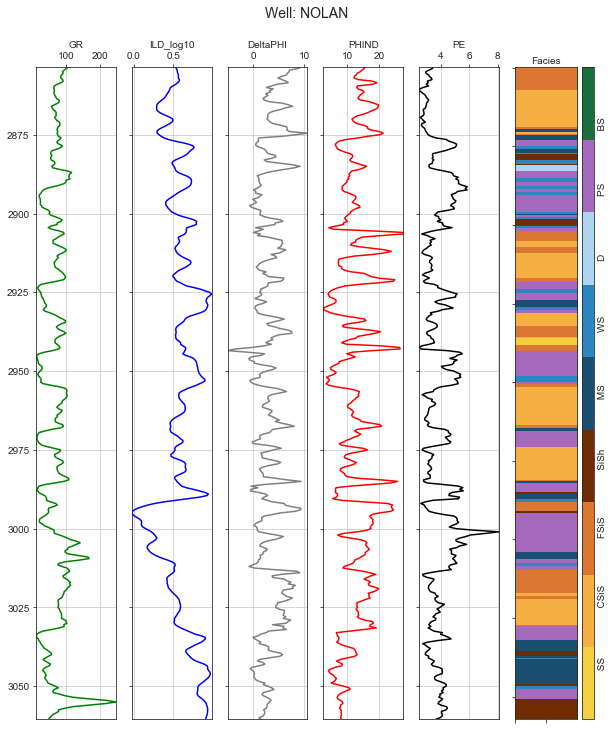

In [182]:
facies_log_plot(blind_well, facies_color)

In addition to individual wells, we can look at how the various facies are represented by the entire training set. Let's plot a histogram of the number of training examples for each facies class.

SS      255
CSiS    620
FSiS    547
SiSh    156
MS      170
WS      432
D        94
PS      382
BS      161
Name: Facies, dtype: int64

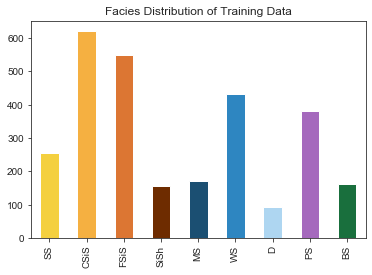

In [36]:
#we count the number of unique entried for each facies
#sort them by facies number
facies_count = training_data['Facies'].value_counts().sort_index()

#set label of facies-count to facies_label
facies_count.index = facies_label
facies_count.plot(kind='bar', title="Facies Distribution of Training Data", 
                  color=facies_color)
facies_count

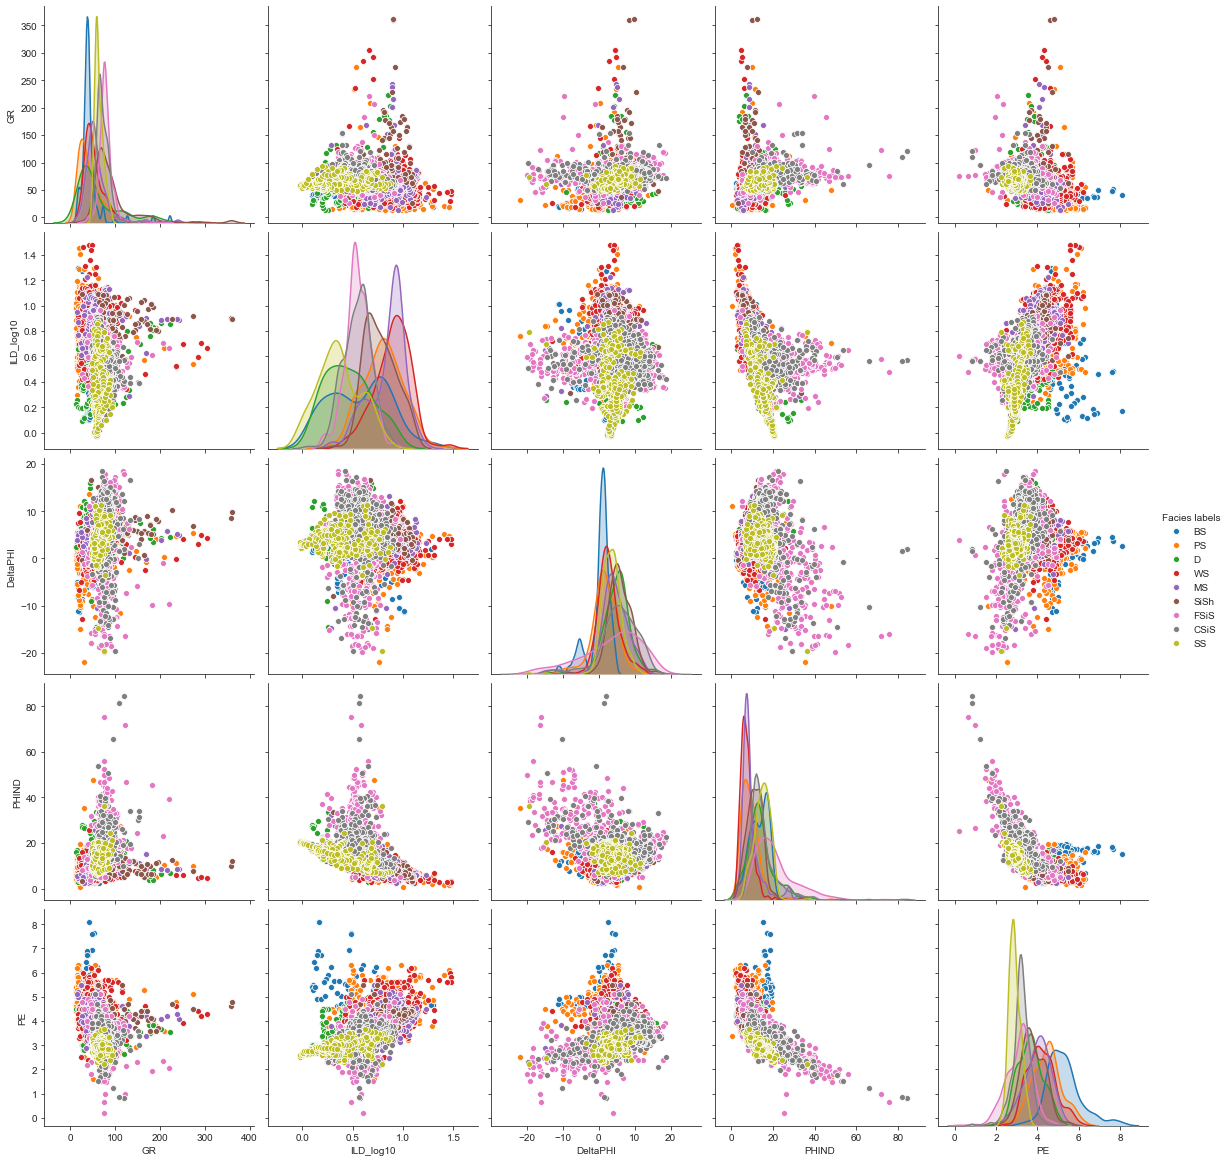

In [37]:
#Create crossplots to visualize the variation between all the variables in the dataset
#Use the seaborn library

#save plot display settings to change back to when done plotting with seaborn


import seaborn as sns
sns.set_style()
sns.set_style("ticks")
new_data = training_data.drop(columns = ['Well Name','Formation','Facies','Depth','NM_M','RELPOS'])
palette = sns.color_palette("tab10")
sns.pairplot(new_data, hue='Facies labels', hue_order=list(reversed(facies_label)), palette=palette, height=3.2)


Conditioning the data set

In [38]:
#Extract feauture variables needed for classification.
correct_facies_labels = training_data['Facies'].values

feature_vectors = training_data.drop(['Formation', 'Well Name', 'Depth','Facies','Facies labels'], axis=1)
feature_vectors.describe()

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000
mean,65.758900,0.650132,3.622337,13.672645,3.705430,1.494143,0.516056
std,30.556841,0.245490,5.520167,8.017761,0.897332,0.500054,0.286780
min,13.280000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,47.110000,0.493000,1.100000,8.350000,3.100000,1.000000,0.268000
50%,65.156000,0.630021,3.600000,12.170000,3.533000,1.000000,0.517000
75%,78.950000,0.824000,6.800000,16.650000,4.300000,2.000000,0.765000
max,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


use the StandardScalar class to fit the training set and later use it to standardize any training data
Scikit includes a preprocessing module that can 'standardize' the data (giving each variable zero mean and unit variance, also called whitening).

In [39]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(feature_vectors)
#Transform the scaler variable
scaled_features = scaler.transform(feature_vectors)
feature_vectors

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,78.260,0.661,14.200,12.565,4.100,1,0.979
2,79.050,0.658,14.800,13.050,3.600,1,0.957
3,86.100,0.655,13.900,13.115,3.500,1,0.936
4,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...
3227,46.719,0.947,1.828,7.254,3.617,2,0.685
3228,44.563,0.953,2.241,8.013,3.344,2,0.677
3229,49.719,0.964,2.925,8.013,3.190,2,0.669
3230,51.469,0.965,3.083,7.708,3.152,2,0.661



Scikit also includes a handy function to randomly split the training data into training and test sets. The test set contains a small subset of feature vectors that are not used to train the network. Because we know the true facies labels for these examples, we can compare the results of the classifier to the actual facies and determine the accuracy of the model. Let's use 30% of the data for the test set.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
# we have training sets and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features,correct_facies_labels, 
                                                    test_size=0.1, random_state=0)

Training the SVM Classifier

Use the conditioned data set to create a facies classifier.
The SVM is a map of the feature vectors as points in a multi dimensional space, mapped so that examples from different facies are divided by a clear gap that is as wide as possible.

In [110]:
from sklearn.svm import SVC
clf = SVC(kernel="rbf", C=1.0).fit(X_train, y_train)
print(X_train.shape)
print(y_train.shape)
clf.score(X_test,y_test)

(2535, 7)
(2535,)


0.6418439716312057

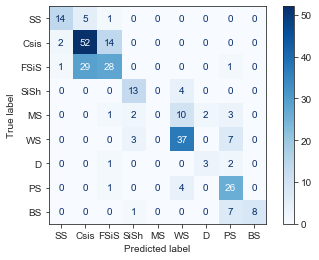

In [111]:
from sklearn.metrics import plot_confusion_matrix
labels = faciesLabel.Label
plot_confusion_matrix(clf,X_test,y_test,cmap=plt.cm.Blues,
                      display_labels=labels)
plt.show()

Below we define two functions that will give an overall value for how the algorithm is performing. The accuracy is defined as the number of correct classifications divided by the total number of classifications.

As noted above, the boundaries between the facies classes are not all sharp, and some of them blend into one another. The error within these 'adjacent facies' can also be calculated. We define an array to represent the facies adjacent to each other. For facies label i, adjacent_facies[i] is an array of the adjacent facies labels.

In [112]:
conf = confusion_matrix(y_test, clf.predict(X_test))
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

adjacent_facies = np.array([[1], [0,2], [1], [4], [3,5], [4,6,7], [5,7], [5,6,8], [6,7]])

def accuracy_adjacent(conf, adjacent_facies):
    classes = conf.shape[0]
    total_correct_clf = 0
    for i in np.arange(0,classes):
        total_correct_clf += conf[i][i]
        for j in adjacent_facies[i]:
            total_correct_clf += conf[i][j]
    return total_correct_clf / sum(sum(conf))

In [113]:
print('Facies Classification Accuracy = %f' % accuracy(conf))
print()
print('Adjacent Facies classification Accuracy = %f' % accuracy_adjacent(conf,adjacent_facies))

Facies Classification Accuracy = 0.641844

Adjacent Facies classification Accuracy = 0.932624


Compute the cross validation metrics

In [65]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf,scaled_features,
                         correct_facies_labels, cv=6)
scores

array([0.53617021, 0.60425532, 0.60425532, 0.39445629, 0.47334755,
       0.59701493])

Model Parameter Selection

The classifier so far has been built with the default parameters. However, we may be able to get improved classification results with optimal parameter choices.

We will consider two parameters. The parameter C is a regularization factor, and tells the classifier how much we want to avoid misclassifying training examples. A large value of C will try to correctly classify more examples from the training set, but if C is too large it may 'overfit' the data and fail to generalize when classifying new data. If C is too small then the model will not be good at fitting outliers and will have a large error on the training set.

The SVM learning algorithm uses a kernel function to compute the distance between feature vectors. Many kernel functions exist, but in this case we are using the radial basis function rbf kernel (the default). The gamma parameter describes the size of the radial basis functions, which is how far away two vectors in the feature space need to be to be considered close.

We will train a series of classifiers with different values for C and gamma. Two nested loops are used to train a classifier for every possible combination of values in the ranges specified. The classification accuracy is recorded for each combination of parameter values. The results are shown in a series of plots, so the parameter values that give the best classification accuracy on the test set can be selected.

This process is also known as 'cross validation'. Often a separate 'cross validation' dataset will be created in addition to the training and test sets to do model selection. For this tutorial we will just use the test set to choose model parameters.

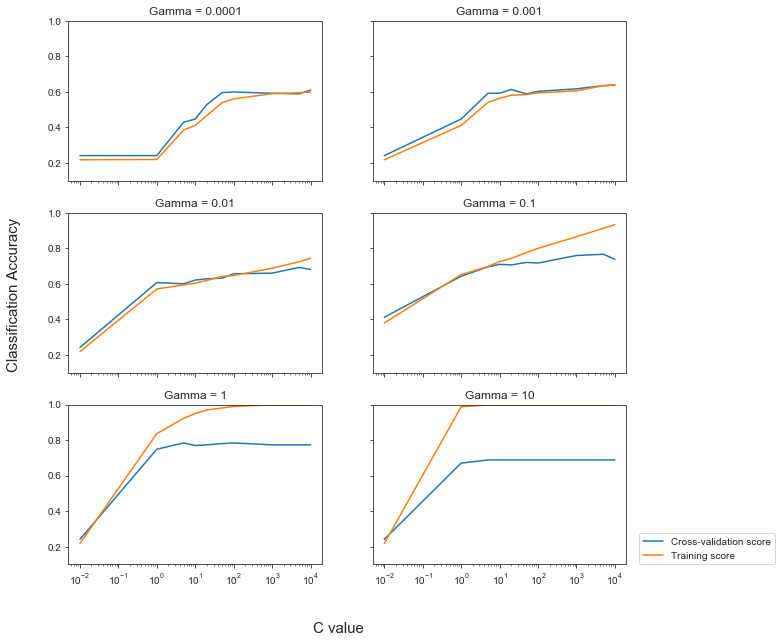

In [80]:
from sklearn.metrics import confusion_matrix

#model selection takes a few minutes, change this variable
#to true to run the parameter loop
do_model_selection = True

if do_model_selection:
    C_range = np.array([.01, 1, 5, 10, 20, 50, 100, 1000, 5000, 10000])
    gamma_range = np.array([0.0001, 0.001, 0.01, 0.1, 1, 10])
    
    fig, axes = plt.subplots(3, 2, 
                        sharex='col', sharey='row',figsize=(10,10))
    plot_number = 0
    for outer_ind, gamma_value in enumerate(gamma_range):
        row = int(plot_number / 2)
        column = int(plot_number % 2)
        cv_errors = np.zeros(C_range.shape)
        train_errors = np.zeros(C_range.shape)
        for index, c_value in enumerate(C_range):
            
            clf = SVC(C=c_value, gamma=gamma_value)
            clf.fit(X_train,y_train)
            
            train_conf = confusion_matrix(y_train, clf.predict(X_train))
            cv_conf = confusion_matrix(y_test, clf.predict(X_test))
        
            cv_errors[index] = accuracy(cv_conf)
            train_errors[index] = accuracy(train_conf)

        ax = axes[row, column]
        ax.set_title('Gamma = %g'%gamma_value)
        ax.semilogx(C_range, cv_errors, label='Cross-validation score')
        ax.semilogx(C_range, train_errors, label='Training score')
        plot_number += 1
        ax.set_ylim([0.1,1])
        
    ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
    fig.text(0.5, 0.03, 'C value', ha='center',
             fontsize=15)
             
    fig.text(0.04, 0.5, 'Classification Accuracy', va='center', 
             rotation='vertical', fontsize=15)

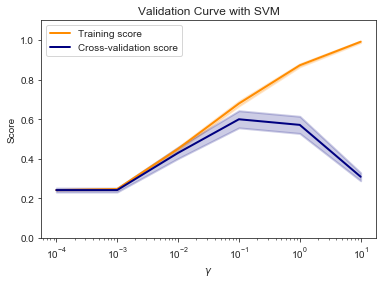

In [119]:
from sklearn.model_selection import validation_curve
param_range = C_range


train_scores, test_scores = validation_curve(SVC(),X_test,y_test, 
                                             param_name="gamma", param_range=param_range
                                             , scoring="accuracy",
                                             n_jobs=1, cv=6)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

array([[14,  5,  1,  0,  0,  0,  0,  0,  0],
       [ 2, 52, 14,  0,  0,  0,  0,  0,  0],
       [ 1, 29, 28,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 13,  0,  4,  0,  0,  0],
       [ 0,  0,  1,  2,  0, 10,  2,  3,  0],
       [ 0,  0,  0,  3,  0, 37,  0,  7,  0],
       [ 0,  0,  1,  0,  0,  0,  3,  2,  0],
       [ 0,  0,  1,  0,  0,  4,  0, 26,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  7,  8]], dtype=int64)

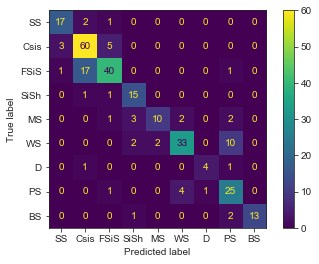

In [197]:
opt_clf = SVC(C=10, gamma=1).fit(X_train,y_train)
acc_conf = confusion_matrix(y_test, opt_clf.predict(X_test))
cv_conf = plot_confusion_matrix(opt_clf,X_test,y_test, display_labels=labels)
conf

In [198]:
print('Optimized facies classification accuracy = %.2f' % accuracy(acc_conf))
print('Optimized adjacent facies classification accuracy = %.2f' % accuracy_adjacent(acc_conf, adjacent_facies))

Optimized facies classification accuracy = 0.77
Optimized adjacent facies classification accuracy = 0.95


Applying the classification model to the blind well

In [121]:
blind_well

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
1882,2,A1 SH,NOLAN,2853.5,106.813,0.533,9.339,15.222,3.500,1,1.000
1883,3,A1 SH,NOLAN,2854.0,100.938,0.542,8.857,15.313,3.416,1,0.977
1884,3,A1 SH,NOLAN,2854.5,94.375,0.553,7.097,14.583,3.195,1,0.955
1885,3,A1 SH,NOLAN,2855.0,89.813,0.554,7.081,14.110,2.963,1,0.932
1886,3,A1 SH,NOLAN,2855.5,91.563,0.560,6.733,13.189,2.979,1,0.909
...,...,...,...,...,...,...,...,...,...,...,...
2292,4,C LM,NOLAN,3058.5,70.750,0.936,2.249,8.249,4.062,2,0.536
2293,4,C LM,NOLAN,3059.0,61.500,0.932,2.120,8.231,4.137,2,0.527
2294,4,C LM,NOLAN,3059.5,56.813,0.926,1.909,8.248,4.105,2,0.518
2295,4,C LM,NOLAN,3060.0,52.281,0.921,1.109,8.022,3.965,2,0.509


In [122]:
#Label vector is the facies column
y_blind = blind_well['Facies'].values

We can form the feature matrix by dropping some of the columns and making a new dataframe:

In [123]:
well_features = blind_well.drop(columns = ['Facies','Formation','Well Name','Depth'])

Transform well features using scaler.transform

In [124]:
X_blind = scaler.transform(well_features)

In [127]:
y_pred = opt_clf.predict(X_blind)
blind_well['Prediction'] = y_pred

Generate the confusion matrix for y_blind and y_pred

In [128]:
acc_conf = confusion_matrix(y_blind, y_pred)
print('Optimized facies classification accuracy = %.2f' % accuracy(acc_conf))
print('Optimized adjacent facies classification accuracy = %.2f' % accuracy_adjacent(acc_conf, adjacent_facies))

Optimized facies classification accuracy = 0.44
Optimized adjacent facies classification accuracy = 0.82


From the above the model does well on the adjacent facies but not on the facies classification

In [165]:
def compare_facies_plot(logs, compared, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compared].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(9, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im1 = ax[5].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im2 = ax[6].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="30%", pad=0.1)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((18*' ').join(['SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS  ', '  BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    ax[6].set_xlabel(compared)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

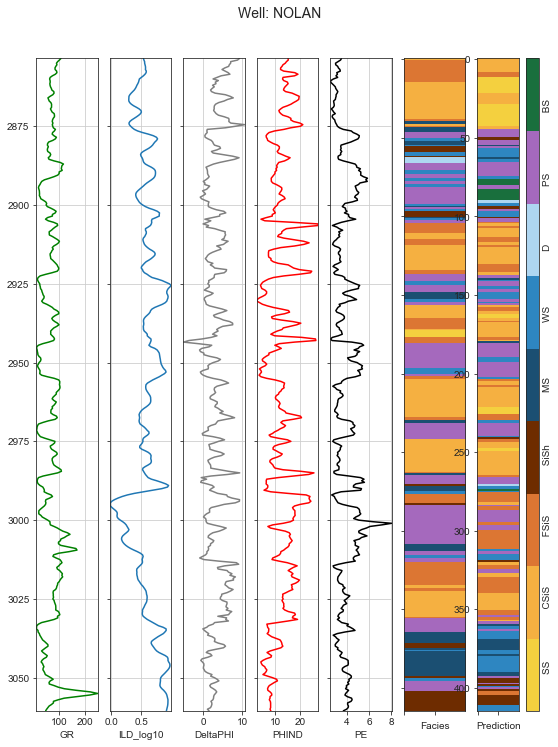

In [166]:
compare_facies_plot(blind_well, 'Prediction', facies_color)

Apply the classification model to new data

In [167]:
well_data = pd.read_csv('../data/validation_data_nofacies.csv')
well_data['Well Name'] = well_data['Well Name'].astype('category')
well_features = well_data.drop(['Formation', 'Well Name', 'Depth'], axis=1)

The data needs to be scaled using the same constants we used for the training data.

In [168]:
X_unknown = scaler.transform(well_features)
y_unknown = clf.predict(X_unknown)
well_data['Facies'] = y_unknown
well_data

,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies
0,A1 SH,STUART,2808.0,66.276,0.630,3.300,10.650,3.591,1,1.000,3
1,A1 SH,STUART,2808.5,77.252,0.585,6.500,11.950,3.341,1,0.978,2
2,A1 SH,STUART,2809.0,82.899,0.566,9.400,13.600,3.064,1,0.956,2
3,A1 SH,STUART,2809.5,80.671,0.593,9.500,13.250,2.977,1,0.933,2
4,A1 SH,STUART,2810.0,75.971,0.638,8.700,12.350,3.020,1,0.911,2
...,...,...,...,...,...,...,...,...,...,...,...
825,C SH,CRAWFORD,3158.5,86.078,0.554,5.040,16.150,3.161,1,0.639,2
826,C SH,CRAWFORD,3159.0,88.855,0.539,5.560,16.750,3.118,1,0.611,2
827,C SH,CRAWFORD,3159.5,90.490,0.530,6.360,16.780,3.168,1,0.583,2
828,C SH,CRAWFORD,3160.0,90.975,0.522,7.035,16.995,3.154,1,0.556,2


In [170]:
well_data['Well Name'].unique()

[STUART, CRAWFORD]
Categories (2, object): [STUART, CRAWFORD]

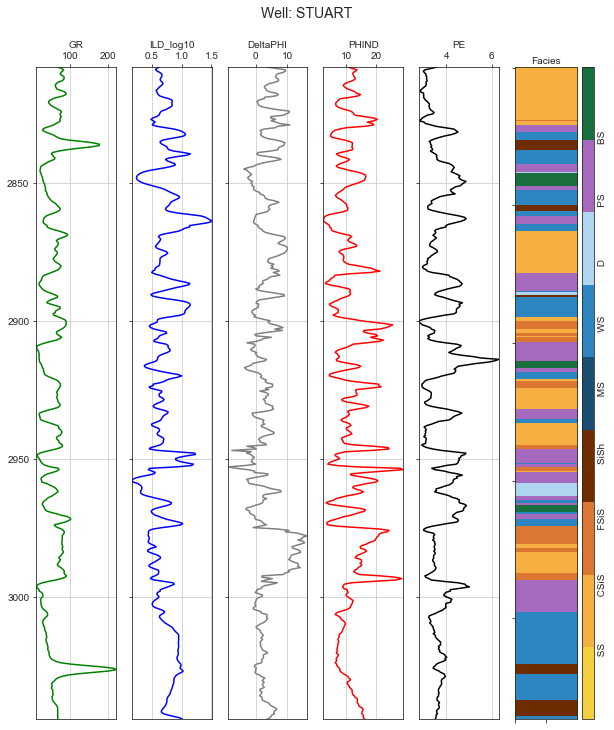

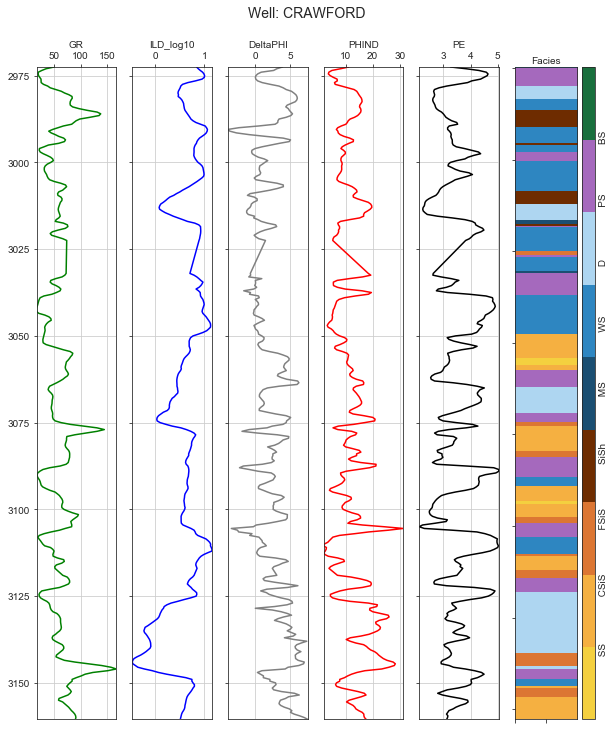

In [174]:
facies_log_plot(
    well_data[well_data['Well Name'] == 'STUART'],
    facies_color=facies_color)

facies_log_plot(
    well_data[well_data['Well Name'] == 'CRAWFORD'],
    facies_color=facies_color)